In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.style.use('ggplot')# 更改设计风格

In [2]:
df = pd.read_table('f:/test/CDNOW_master.txt',sep='\s+',names=['user_Id','order_dt','order_products','order_amount'])

In [3]:
df.head()

,user_Id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_Id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
df.describe()

,user_Id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


# Datetime
* 更改列的数据类型

In [6]:
df['order_dt'] = pd.to_datetime(df.order_dt,format='%Y%m%d')

In [7]:
df.head()

,user_Id,order_dt,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [8]:
df['Month'] = df.order_dt.values.astype('datetime64[M]')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_Id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
Month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


# 1每月消费趋势分析

* 每月消费总额
* 每月消费次数
* 每月产品购买量
* 每月消费人数

In [10]:
order_month_amount = df.groupby('Month')['order_amount'].sum()# 按月聚合，对order_amount列求和——每月消费总额
order_month_amount.head()

Month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

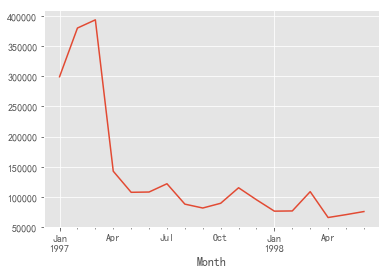

In [11]:
order_month_amount.plot()

**每月消费总额**

In [12]:
grouped_month = df.groupby('Month')

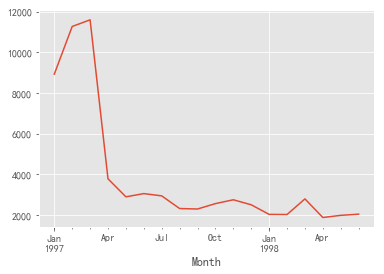

In [13]:
grouped_month['user_Id'].count().plot()

**每月订单数**

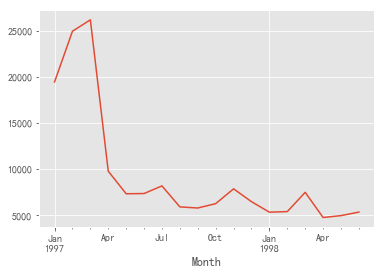

In [14]:
grouped_month['order_products'].sum().plot()

**每月产品购买量**

In [15]:
df.groupby('Month')['user_Id'].apply(lambda x:len(x.drop_duplicates()))# 去重

Month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_Id, dtype: int64

In [16]:
df.groupby(['Month','user_Id']).count().reset_index().groupby('Month').count().user_Id# 通过分组去重，再切

Month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_Id, dtype: int64

**每月消费人数**

# 透视表

In [17]:
df.pivot_table(index='Month',values=['order_amount','user_Id','order_products'],
               aggfunc={'order_amount':'sum',
                       'order_products':'sum',
                       'user_Id':'count'}
              )
# user_Id没有去重，不推荐用透视表去重

,order_amount,order_products,user_Id
Month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


# 2用户个体消费分析

* 用户消费金额、消费次数描述统计
* 用户消费金额和消费次数散点图
* 用户消费金额分布图
* 用户消费次数分布图
* 用户累计消费金额占比（百分之多少的用户占了百分值多少的消费额）

In [18]:
df.groupby('user_Id').sum().describe() #之前的维度按照Month，看的趋势；现在维度变成用户个体

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


* 用户消费金额平均值为106美元，中间数为43美元，说明存在极值干扰
* 用户消费次数平均值为7次，中间数为3次。
* **用户平均购买了7张CD，但中位值只有3，说明小部分用户购买了大量CD**
* **用户平均消费106美元，中位值只有43，判断同上，有极值干扰**

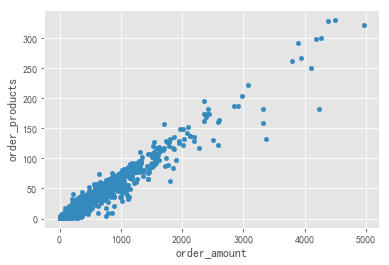

In [19]:
df.groupby('user_Id').sum().query('order_amount<5000').plot(y='order_products',x='order_amount',kind='scatter',)

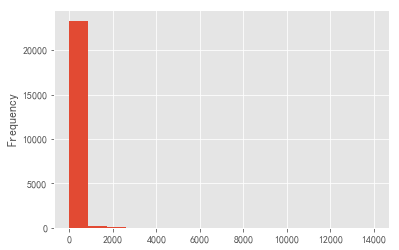

In [20]:
df.groupby('user_Id').sum().order_amount.plot(kind='hist',bins=16)# 直方图

* 从直方图可知，用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断。
* 可使用**过滤操作**排除异常

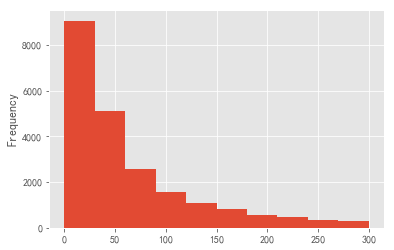

In [21]:
df.groupby('user_Id').sum().query('order_amount<300').order_amount.plot(kind='hist')

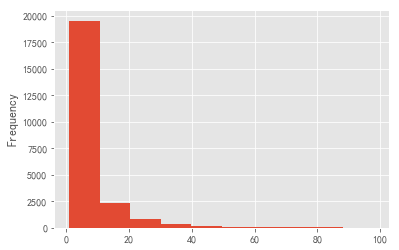

In [22]:
df.groupby('user_Id').sum().query('order_products < 100').order_products.plot(kind='hist')

* 用切比雪夫过滤异常值，计算95%的数据分布情况。

In [23]:
user_cumsum = df.groupby('user_Id').sum().sort_values('order_amount').apply(lambda x:x.cumsum()/x.sum())

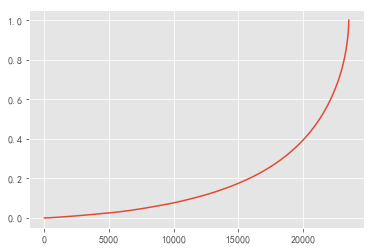

In [24]:
user_cumsum.reset_index().order_amount.plot()

* 用户消费金额按升序排列，50%用户仅贡献了15%消费额
* 消费额排名前5000的用户，贡献了60%的消费额

# 3用户消费行为

* 用户第一次消费（首付）
* 用户最后一次消费
* 新来客户消费比
    * 多少用户仅消费一次
    * 每月新客户占比
* 用户分层
    * RFM
    * 新、活跃、回流、流失
* 用户购买周期（按订单）
    * 用户消费周期描述
    * 用户消费周期分布
* 用户生命周期（第一次&最后一次）
    * 用户生命周期描述
    * 用户生命周期分布

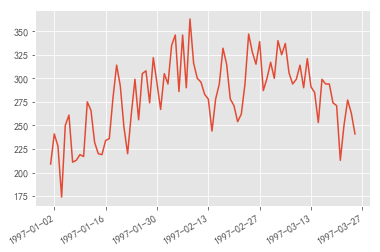

In [25]:
df.groupby('user_Id').min().order_dt.value_counts().plot()# 用户第一次购买日期分布

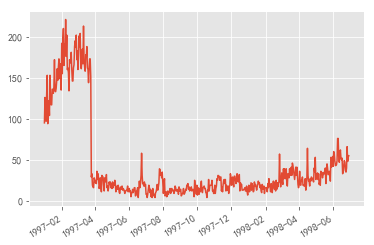

In [26]:
df.groupby('user_Id').max().order_dt.value_counts().plot()

* 用户最后一次购买的分布，比第一次分布广
* 大部分用户最后一次购买，集中在前三月，说明用户购买一次后就不再购买了

In [27]:
df.head()

,user_Id,order_dt,order_products,order_amount,Month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [28]:
user_life = df.groupby('user_Id').order_dt.agg(['min','max'])

In [29]:
type(df.groupby('user_Id'))

pandas.core.groupby.groupby.DataFrameGroupBy

* agg 应用于 DataFrameGroupby

In [30]:
(user_life['min'] == user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

* 列的对比，并统计
* 有一般用户只消费了一次

# RFM

In [31]:
rfm = df.pivot_table(index = 'user_Id',
              values = ['order_products','order_amount','order_dt'],
              aggfunc = {'order_dt':'max', #最近购买
                         'order_products':'sum',# 购买总量
                        'order_amount':'sum'})# 消费总金额
rfm.head()

,order_amount,order_dt,order_products
user_Id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [32]:
rfm['R'] = -(rfm.order_dt- np.datetime64('today'))/np.timedelta64(1,'D')

* /np.timedelta64[1,'D']
* 消除单位‘days’
* np.datetime64('today'),单位天

In [33]:
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace = True)

In [34]:
rfm.head()

,M,order_dt,F,R
user_Id,,,,
1,11.77,1997-01-01,1,7974.0
2,89.00,1997-01-12,6,7963.0
3,156.46,1998-05-28,16,7462.0
4,100.50,1997-12-12,7,7629.0
5,385.61,1998-01-03,29,7607.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E22AFB0>,
      dtype=object)

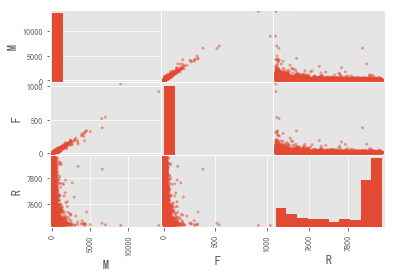

In [54]:
rfm_1 = rfm.loc[:,['M','F','R']]
pd.plotting.scatter_matrix(rfm)# 散点图矩阵

* R 最近一次消费
* F 消费频率
* M 消费金额

In [35]:
type(np.datetime64('today'))

numpy.datetime64

In [36]:
type(rfm.loc[1,'order_dt'])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
rfm.tail()

,M,order_dt,F,R
user_Id,,,,
23566,36.00,1997-03-25,2,7891.0
23567,20.97,1997-03-25,1,7891.0
23568,121.70,1997-04-22,6,7863.0
23569,25.74,1997-03-25,2,7891.0
23570,94.08,1997-03-26,5,7890.0


# 对用户分级

In [38]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
        }
    result = d[label]
    return result

In [39]:
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)

In [40]:
rfm.head()

,M,order_dt,F,R,label
user_Id,,,,,
1,11.77,1997-01-01,1,7974.0,一般发展客户
2,89.00,1997-01-12,6,7963.0,一般发展客户
3,156.46,1998-05-28,16,7462.0,重要保持客户
4,100.50,1997-12-12,7,7629.0,一般挽留客户
5,385.61,1998-01-03,29,7607.0,重要保持客户


In [41]:
(rfm.label =='重要价值客户').value_counts()

False    22783
True       787
Name: label, dtype: int64

In [42]:
rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,14074,14074,14074,14074
一般挽留客户,3300,3300,3300,3300
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,241,241,241,241
重要挽留客户,331,331,331,331


* 各级客户

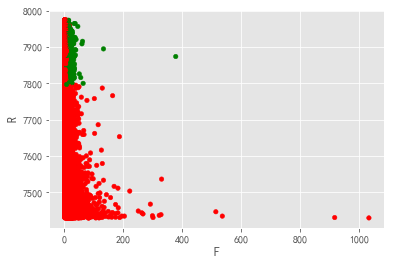

In [43]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[~(rfm.label == '重要价值客户'),'color'] = 'r'
rfm.plot.scatter('F','R',c=rfm.color)

In [44]:
rfm.head()

,M,order_dt,F,R,label,color
user_Id,,,,,,
1,11.77,1997-01-01,1,7974.0,一般发展客户,r
2,89.00,1997-01-12,6,7963.0,一般发展客户,r
3,156.46,1998-05-28,16,7462.0,重要保持客户,r
4,100.50,1997-12-12,7,7629.0,一般挽留客户,r
5,385.61,1998-01-03,29,7607.0,重要保持客户,r


In [45]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,608328.0
一般保持客户,19937.45,1712,1559822.0
一般发展客户,438291.81,29346,111507561.0
一般挽留客户,196971.23,13977,25106808.0
重要价值客户,167080.83,11121,6204986.0
重要保持客户,1592039.62,107789,34348933.0
重要发展客户,33028.40,1263,1904871.0
重要挽留客户,45785.01,2023,2515635.0


从RFM分层可知，大部分用户为重要保持客户，但是这时由于极值的影响（x-x.mean(),mean改为中位数等），所以RFM的划分标准应该以业务为准：

* 尽量用小部分的用户覆盖大部分的额度
* 不要为了数据好看划分等级

In [46]:
pivot_counts = df.pivot_table(index='user_Id',
              columns='Month',
              values='order_dt',
              aggfunc='count').fillna(0)

In [47]:
pivot_counts.head()

Month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_Id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_counts = pivot_counts.applymap(lambda x:1 if x>0 else 0)
df_counts.tail()

Month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_Id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
def active_status(data):
    status = []
    for i in range(18):
        if data[i] ==0:
            if len(status)>0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
                
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status )

In [50]:
purchase_state = df_counts.apply(active_status,axis=1)

KeyboardInterrupt: 

In [ ]:
purchase_state.head()

In [ ]:
columns = df.Month.sort_values().unique()

In [ ]:
purchase_state.columns = columns

In [ ]:
purchase_state.head()

In [ ]:
df_status = purchase_state.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))

In [ ]:
df_status.T.head()

In [ ]:
df_status.fillna(0).T.plot(kind='area')

In [ ]:
df_status.fillna(0).T.apply(lambda x:x/x.sum(),axis = 1).plot.area()# 每月消费用户占比

* 用户购买周期

In [ ]:
order_diff = df.groupby('user_Id').apply(lambda x:x.order_dt - x.order_dt.shift())
order_diff.head()

In [ ]:
order_diff.describe()

In [ ]:
(order_diff/np.timedelta64(1,'D')).hist(bins = 20) # 消除单位days, /np.timedelta64(1,'D')

* 订单周期呈指数分布
* 用户平均购买周期是68天
* 绝大部分用户购买周期都低于100天

In [ ]:
user_life = df.groupby('user_Id').order_dt.agg(['min','max'])

In [ ]:
user_life.head()

In [ ]:
(user_life['max']-user_life['min']).describe()

In [ ]:
u_1 = ((user_life['max']-user_life['min'])/np.timedelta64(1,'D'))
u_1.plot(kind='hist',bins = 40)

* 用户的生命周期受只购买一次的用户影响比较厉害（可以排除）
* 用户均消费134天，**中位数仅0天**

In [ ]:
u_1[u_1 > 0].hist(bins = 40)

# 4复购率，回购率

* 复购率
    * 自然月内，购买多次的用户占比
* 回购率
    * 曾经够过的用户再某一期间内的再次购买占比

In [ ]:
df_counts.head()

In [ ]:
products_re = pivot_counts.applymap(lambda x:1 if x>1 else np.NaN if x ==0 else 0)
products_re.head()

In [ ]:
(products_re.sum()/products_re.count()).plot(figsize=(12,4))
# sum求得复购人数，count求得总消费人数

* 复购率稳定在20%，前三个月因大量因用户涌入，而这批用户只购买一次，所以导致复购率降低

In [ ]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)       
    return pd.Series(status)

In [ ]:
purchase_state = df_counts.apply(purchase_return,axis=1)

In [ ]:
purchase_state.head()

In [ ]:
purchase_state.columns = df.Month.sort_values().unique()

In [ ]:
purchase_state.head()

In [ ]:
(purchase_state.sum()/purchase_state.count()).plot(figsize=(12,4))
plt.xlabel('月份(月)')
plt.ylabel('百分比（%）')